#a.Create collections “flights” inside database “airline_delayDB”

In [17]:
from pymongo import MongoClient
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def mongoimport(csv_path):

    flight_df=pd.read_csv(csv_path)
    payload=json.loads(flight_df.to_json(orient='records'))
    collection.delete_many({}) 
    collection.insert_many(payload)
    
if __name__ == "__main__":
    client=MongoClient("mongodb://localhost:27017")
    print(client)
    db=client['airline_delayDB']
    collection=db['flights']
    mongoimport('D:/Flights_Delay.csv')

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)


#b.Average arrival delay caused by airlines

In [29]:
    avg_delay = collection.aggregate([
        {'$group' : {'_id' : 'null', 'average_arrival_delay':{ '$avg' : '$ARRIVAL_DELAY'}}}, 
                    {'$project' : {'_id' : 0}}])
    for item in avg_delay:
        item['average_arrival_delay'] = np.round(item['average_arrival_delay'], 2)
        print(item)

{'average_arrival_delay': 7.55}


#c Days of months with respect to average of arrival delays. [Create a suitable plot using matplotlib/seaborn]

,_id,average_arrival_delay
0,3,11.343455
1,2,8.122952
2,1,5.860943


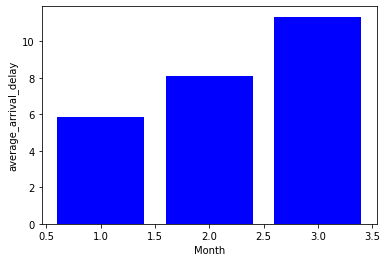

In [30]:
    avg_delay1 = collection.aggregate([
        {'$group' : {'_id' : '$MONTH', 'average_arrival_delay':{ '$avg' : '$ARRIVAL_DELAY'}}} 
        ])
    df=pd.DataFrame(avg_delay1)  
    display(df)
    plt.bar(df['_id'], df['average_arrival_delay'],color='blue')
    plt.xlabel('Month')
    plt.ylabel('average_arrival_delay')
    plt.show()
    

d)Arrange weekdays with respect to the average arrival delays caused. [Create a suitable plot using matplotlib/seaborn]

,_id,average_arrival_delay
0,1,10.807447
1,7,10.110840
2,2,8.033644
3,4,7.174969
4,5,6.010538
5,3,5.587079
6,6,4.888689


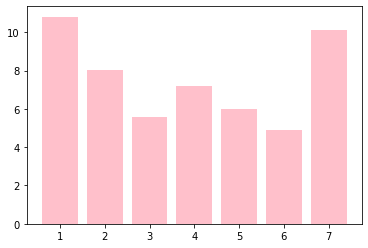

In [32]:
avg_delay1 = collection.aggregate([{'$group' : {'_id' : '$DAY_OF_WEEK', 'average_arrival_delay':{ '$avg' : '$ARRIVAL_DELAY'}}},
        {'$sort' : {'average_arrival_delay':-1}}])
df=pd.DataFrame(avg_delay1)
display(df)    
plt.bar(df['_id'], df['average_arrival_delay'],color='pink')
plt.show()

e)Arrange Days of month as per cancellations done in descending order.  [Create a suitable plot using matplotlib/seaborn]

,_id,cancelled
0,1,237
1,5,215
2,2,195
3,27,185
4,26,114
5,4,113
6,28,98
7,9,89
8,3,88
9,15,83


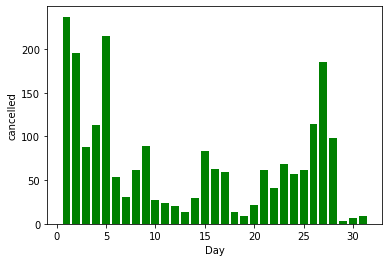

In [33]:
avg_delay2 = collection.aggregate([{'$group' : {'_id' : '$DAY', 'cancelled':{ '$sum' : "$CANCELLED"}}},
                                   {'$sort' : {'cancelled':-1}}])

df=pd.DataFrame(avg_delay2)
display(df) 
plt.xlabel('Day')
plt.ylabel('cancelled')
plt.bar(df['_id'], df['cancelled'],color='green')
plt.show()

f)Find the busiest airports with respect to day of week. Create a suitable plot using matplotlib/seaborn.

In [34]:
b = collection.aggregate([{'$group' : {'_id' :{'ORIGIN_AIRPORT':'$ORIGIN_AIRPORT','DAY_OF_WEEK':'$DAY_OF_WEEK'},
                                                     'totalcount':{'$count':{}}}},
                                        {'$sort':{'totalcount':-1}}])
df=pd.DataFrame(b)
display(df)

,_id,totalcount
0,"{'ORIGIN_AIRPORT': 'ATL', 'DAY_OF_WEEK': 5}",574
1,"{'ORIGIN_AIRPORT': 'ATL', 'DAY_OF_WEEK': 4}",556
2,"{'ORIGIN_AIRPORT': 'ATL', 'DAY_OF_WEEK': 1}",555
3,"{'ORIGIN_AIRPORT': 'ATL', 'DAY_OF_WEEK': 3}",505
4,"{'ORIGIN_AIRPORT': 'ATL', 'DAY_OF_WEEK': 7}",499
...,...,...
1926,"{'ORIGIN_AIRPORT': 'CDV', 'DAY_OF_WEEK': 7}",1
1927,"{'ORIGIN_AIRPORT': 'APN', 'DAY_OF_WEEK': 4}",1
1928,"{'ORIGIN_AIRPORT': 'ERI', 'DAY_OF_WEEK': 6}",1
1929,"{'ORIGIN_AIRPORT': 'MMH', 'DAY_OF_WEEK': 2}",1


g)Find top 10 Airlines of US. Create a suitable plot using matplotlib/seaborn

,_id,count
0,WN,11738
1,DL,7989
2,EV,5916
3,OO,5708
4,AA,5250
5,UA,4701
6,US,3925
7,MQ,3502
8,B6,2548
9,AS,1586


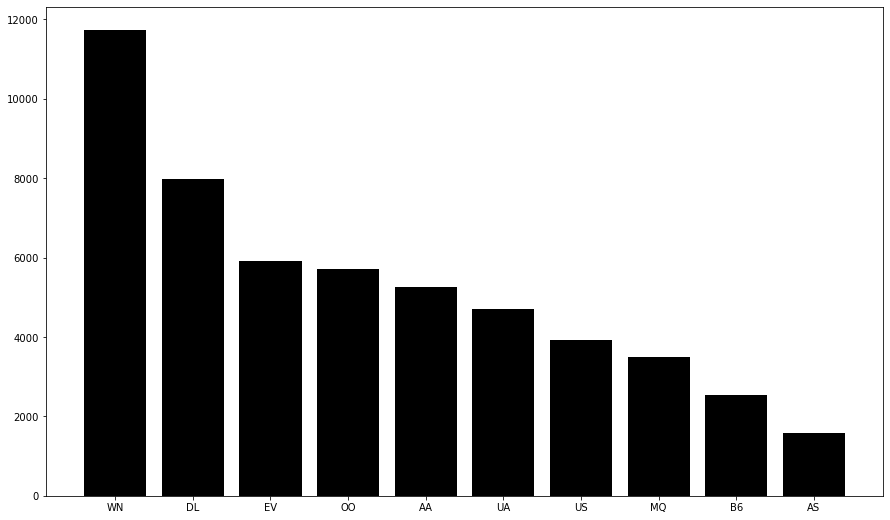

In [35]:
plt.figure(figsize = (15,9))
avg_delay1 = collection.aggregate([{'$group' : {'_id' : '$AIRLINE', 'count':{ '$count' : {}}}},
        {'$sort' : {'count':-1}},{'$limit':10}])
df=pd.DataFrame(avg_delay1)
display(df)  
plt.bar(df['_id'], df['count'],color='black')
plt.show()

h)Finding airlines that make the maximum, minimum number of cancellations.

In [36]:
print('Maximum number of cancellation')
#plt.figure(figsize = (15,9))
avg_delay1 = collection.aggregate([{'$group' : {'_id' : '$AIRLINE', 'cancelled':{ '$sum' : '$CANCELLED'}}},
        {'$sort' : {'cancelled':-1}},{'$limit':1}])
df=pd.DataFrame(avg_delay1)
display(df)  
#plt.bar(df['_id'], df['cancelled'],color='red')
#plt.show()


print('\n')
print('Minimum number of cancellation')
#plt.figure(figsize = (15,9))
avg_delay1 = collection.aggregate([{'$group' : {'_id' : '$AIRLINE', 'cancelled':{ '$sum' : '$CANCELLED'}}},
        {'$sort' : {'cancelled':1}},{'$limit':1}])
df=pd.DataFrame(avg_delay1)
display(df)

Maximum number of cancellation


,_id,cancelled
0,MQ,414




Minimum number of cancellation


,_id,cancelled
0,HA,3


i)Find and show airlines names in descending that make the most number of diversions made. [Create a suitable plot using matplotlib/seaborn]

,_id,diversions
0,WN,35
1,OO,25
2,EV,22
3,DL,18
4,B6,16
5,AA,12
6,US,9
7,UA,8
8,MQ,5
9,HA,1


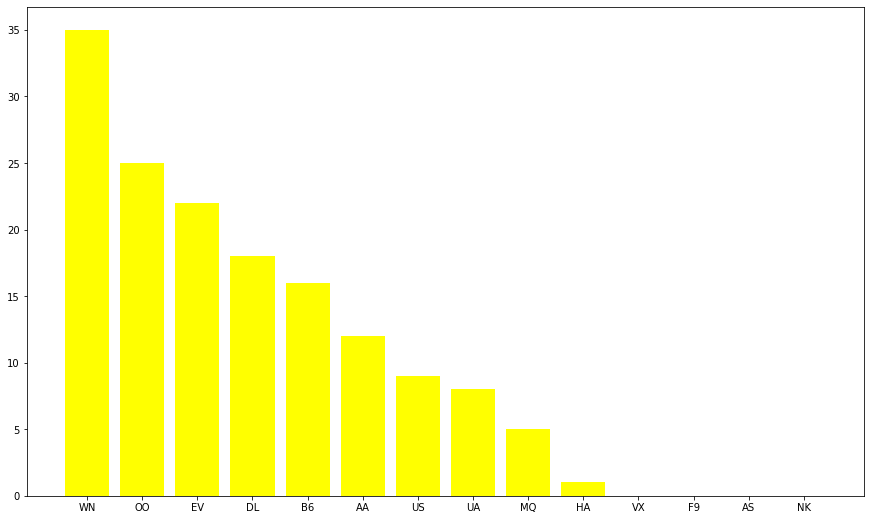

In [37]:
plt.figure(figsize = (15,9))
avg_delay1 = collection.aggregate([{'$group' : {'_id' : '$AIRLINE', 'diversions':{ '$sum' : '$DIVERTED'}}},
        {'$sort' : {'diversions':-1}}])
df=pd.DataFrame(avg_delay1)
display(df) 
plt.bar(df['_id'], df['diversions'],color='yellow')
plt.show()

j)Finding days of month that see the most number of diversion

In [26]:
plt.figure(figsize = (15,9))
avg_delay1 = collection.aggregate([{'$group' : {'_id' : '$MONTH', 'diversions':{ '$sum' : '$DIVERTED'}}},
        {'$sort' : {'diversions':-1}},{'$limit':1}])
df=pd.DataFrame(avg_delay1)
display(df)


,_id,diversions
0,2,60


<Figure size 1080x648 with 0 Axes>

k)Calculating mean and standard deviation of departure delay for all flights in minutes

In [38]:
avg_delay1 = collection.find({},{"DEPARTURE_DELAY":1,'_id':0})
df=pd.DataFrame(avg_delay1)
print(df.mean())
print(df.std())




DEPARTURE_DELAY    11.329091
dtype: float64
DEPARTURE_DELAY    39.620916
dtype: float64


l)Calculating mean and standard deviation of arrival delay for all flights in minutes

In [24]:
avg_delay1 = collection.find({},{"ARRIVAL_DELAY":1,'_id':0})
df=pd.DataFrame(avg_delay1)
print(df.mean())
print(df.std())

ARRIVAL_DELAY    7.545458
dtype: float64
ARRIVAL_DELAY    42.378386
dtype: float64


m)Create a partitioning table “flights_partition” using partitioned by schema “CANCELLED”

In [23]:
r=collection.aggregate([{'$match':{'CANCELLED':1}}])
flights_partition=pd.DataFrame(r)
display(flights_partition)

,_id,ID,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,63656c953c64930a450faffd,64,2015,2,2,1,EV,6172,N12145,MLI,...,None,None,0,1,C,None,None,None,None,None
1,63656c953c64930a450fb012,85,2015,1,27,2,WN,3131,N8631A,BWI,...,None,None,0,1,B,None,None,None,None,None
2,63656c953c64930a450fb0ae,241,2015,3,6,5,DL,414,N721TW,SFO,...,None,None,0,1,B,None,None,None,None,None
3,63656c953c64930a450fb0ba,253,2015,2,23,1,AA,371,None,DFW,...,None,None,0,1,B,None,None,None,None,None
4,63656c953c64930a450fb0c9,268,2015,2,18,3,MQ,3382,N527MQ,LGA,...,None,None,0,1,B,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2146,63656c963c64930a45108a03,55878,2015,3,4,3,MQ,3463,N524MQ,LGA,...,None,None,0,1,B,None,None,None,None,None
2147,63656c963c64930a45108a15,55896,2015,2,25,3,AA,1233,N3BEAA,BOS,...,None,None,0,1,A,None,None,None,None,None
2148,63656c963c64930a45108a39,55932,2015,2,24,2,MQ,3623,N607MQ,DFW,...,None,None,0,1,B,None,None,None,None,None
2149,63656c963c64930a45108a61,55972,2015,1,12,1,EV,5065,N974EV,SGF,...,None,None,0,1,B,None,None,None,None,None


n)Finding all diverted Route from a source to destination Airport & which route is the most diverted route.


In [22]:
r=collection.aggregate([{'$match' : {'DIVERTED': 1}},
        {'$group' : {'_id' :{'ORIGIN_AIRPORT':'$ORIGIN_AIRPORT','DESTINATION_AIRPORT':'$DESTINATION_AIRPORT'},'count':{'$count':{}}}},
                            {'$sort':{'count':-1}}])
df=pd.DataFrame(r)
print("Diverted route from a source to destination airport \n",df['_id'])
diverted_max=df.get('count').max()
print('\n\n')
print("Most diverted route from a source to destination \n",df[df['count']==diverted_max]['_id'])

Diverted route from a source to destination airport 
 0      {'ORIGIN_AIRPORT': 'PHL', 'DESTINATION_AIRPORT...
1      {'ORIGIN_AIRPORT': 'JFK', 'DESTINATION_AIRPORT...
2      {'ORIGIN_AIRPORT': 'IAH', 'DESTINATION_AIRPORT...
3      {'ORIGIN_AIRPORT': 'ORD', 'DESTINATION_AIRPORT...
4      {'ORIGIN_AIRPORT': 'HOU', 'DESTINATION_AIRPORT...
                             ...                        
137    {'ORIGIN_AIRPORT': 'JFK', 'DESTINATION_AIRPORT...
138    {'ORIGIN_AIRPORT': 'LAX', 'DESTINATION_AIRPORT...
139    {'ORIGIN_AIRPORT': 'BDL', 'DESTINATION_AIRPORT...
140    {'ORIGIN_AIRPORT': 'RDU', 'DESTINATION_AIRPORT...
141    {'ORIGIN_AIRPORT': 'IAH', 'DESTINATION_AIRPORT...
Name: _id, Length: 142, dtype: object



Most diverted route from a source to destination 
 0    {'ORIGIN_AIRPORT': 'PHL', 'DESTINATION_AIRPORT...
1    {'ORIGIN_AIRPORT': 'JFK', 'DESTINATION_AIRPORT...
2    {'ORIGIN_AIRPORT': 'IAH', 'DESTINATION_AIRPORT...
3    {'ORIGIN_AIRPORT': 'ORD', 'DESTINATION_AIRPORT...
4    {'

o)When is the best time of day/day of week/time of a year to fly with minimum delays ?


In [21]:
avg_delay1 = collection.aggregate([{'$group' : {'_id' : '$DAY', 'Arrival_Delay':{ '$min' : '$ARRIVAL_DELAY'}}},{'$sort':{'Arrival_Delay':-1}},{'$limit':1}])
df=pd.DataFrame(avg_delay1)
display(df)

,_id,Arrival_Delay
0,29,-40.0
